```
[Title] Univariate LSTM
[Author] Jason Brownlee
[Etidor] Yibeck.Lee(yibeck.lee@gmail.com)
[reference]
 - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
```

In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [6]:
# split a univariate sequence into samples
from numpy import array
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		print(i)
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [7]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
n_features = 1
# split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X.shape ,X.shape[0], X.shape[1] , n_features)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

0
1
2
3
4
5
(5, 4) 5 4 1
[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90


In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

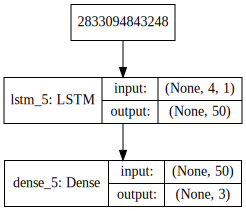

In [13]:
from IPython.display import SVG #jupyter notebook에서 보려고 
from keras.utils.vis_utils import model_to_dot # keras model을 dot language로 변환
from keras.utils import plot_model

plot_model(model, to_file='rnn.svg')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
#str.*find*?
#*Warning?

In [15]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features)) #5,4,1
X
#X.shape

array([[[10],
        [20],
        [30],
        [40]],

       [[20],
        [30],
        [40],
        [50]],

       [[30],
        [40],
        [50],
        [60]],

       [[40],
        [50],
        [60],
        [70]],

       [[50],
        [60],
        [70],
        [80]]])

In [16]:
# fit model
model.fit(X, y, epochs=100, verbose=1) #log를 0 않씀 1 사용

ValueError: Error when checking target: expected dense_5 to have shape (3,) but got array with shape (1,)

In [37]:
# demonstrate prediction
x_input = array([70, 80, 90,100])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)

1/1 [==============================] - 0s 0us/step


In [38]:
x_input,yhat

(array([[[ 70],
         [ 80],
         [ 90],
         [100]]]), array([[111.9794]], dtype=float32))